In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 16}

plt.rc('font', **font)

import json
import requests

In [35]:
cols = ['web-scraper-order','web-scraper-start-url','Name','1hr','24hr','Week','ico_date','ico_px','current_px','ico_roi']

df = pd.read_csv('coinist_roi.csv', names=cols, parse_dates=True, header=0)

In [36]:
df.head()

,web-scraper-order,web-scraper-start-url,Name,1hr,24hr,Week,ico_date,ico_px,current_px,ico_roi
0,1527292605-2271,https://www.coinist.io/roi/?pageno=10,Rise,-0.35,-26.70,-2.39,2016-06-01,$0.52978,$0.0808216,-84.74%
1,1527292571-2049,https://www.coinist.io/roi/?pageno=21,B2BX,-37.26,-33.83,-41.43,2017-11-01,$0.74,$0.336894,-54.47%
2,1527292601-2235,https://www.coinist.io/roi/?pageno=11,Bonpay,-1.99,0.08,-10.81,2017-11-01,$0.85369,$0.250486,-70.66%
3,1527292628-2441,https://www.coinist.io/roi/?pageno=1,BAT,-0.51,2.97,-14.15,2017-05-01,$0.035,$0.311497,789.99%
4,1527292580-2106,https://www.coinist.io/roi/?pageno=18,Raiden Network Token,0.80,4.30,-14.59,2017-11-01,$0.67,$1.39109,107.63%


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 10 columns):
web-scraper-order        457 non-null object
web-scraper-start-url    457 non-null object
Name                     457 non-null object
1hr                      455 non-null float64
24hr                     454 non-null float64
Week                     453 non-null float64
ico_date                 457 non-null object
ico_px                   457 non-null object
current_px               457 non-null object
ico_roi                  457 non-null object
dtypes: float64(3), object(7)
memory usage: 35.8+ KB


In [38]:
#convert data types

df['ico_date'] = pd.to_datetime(df['ico_date'])
df.head()

,web-scraper-order,web-scraper-start-url,Name,1hr,24hr,Week,ico_date,ico_px,current_px,ico_roi
0,1527292605-2271,https://www.coinist.io/roi/?pageno=10,Rise,-0.35,-26.70,-2.39,2016-06-01,$0.52978,$0.0808216,-84.74%
1,1527292571-2049,https://www.coinist.io/roi/?pageno=21,B2BX,-37.26,-33.83,-41.43,2017-11-01,$0.74,$0.336894,-54.47%
2,1527292601-2235,https://www.coinist.io/roi/?pageno=11,Bonpay,-1.99,0.08,-10.81,2017-11-01,$0.85369,$0.250486,-70.66%
3,1527292628-2441,https://www.coinist.io/roi/?pageno=1,BAT,-0.51,2.97,-14.15,2017-05-01,$0.035,$0.311497,789.99%
4,1527292580-2106,https://www.coinist.io/roi/?pageno=18,Raiden Network Token,0.80,4.30,-14.59,2017-11-01,$0.67,$1.39109,107.63%


In [39]:
df['ico_px'] = df.ico_px.str.replace('$', '').astype(float)
df['current_px'] = df.current_px.str.replace('$', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 10 columns):
web-scraper-order        457 non-null object
web-scraper-start-url    457 non-null object
Name                     457 non-null object
1hr                      455 non-null float64
24hr                     454 non-null float64
Week                     453 non-null float64
ico_date                 457 non-null datetime64[ns]
ico_px                   457 non-null float64
current_px               457 non-null float64
ico_roi                  457 non-null object
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 35.8+ KB


In [49]:
df['ico_roi_2'] = df['ico_roi'].apply(lambda x: x.replace('%', ''))

In [52]:
df['ico_roi_2'] = df['ico_roi_2'].apply(lambda x: x.replace(',', ''))

In [55]:
df['ico_roi_2'] = df['ico_roi_2'].astype(float)/100
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 11 columns):
web-scraper-order        457 non-null object
web-scraper-start-url    457 non-null object
Name                     457 non-null object
1hr                      455 non-null float64
24hr                     454 non-null float64
Week                     453 non-null float64
ico_date                 457 non-null datetime64[ns]
ico_px                   457 non-null float64
current_px               457 non-null float64
ico_roi                  457 non-null object
ico_roi_2                457 non-null float64
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 39.4+ KB


In [57]:
df.to_csv('coinist_cleaned.csv')

In [3]:
df = pd.read_csv('coinist_cleaned.csv', index_col=0)

In [4]:
df.drop(labels=['web-scraper-order','web-scraper-start-url','1hr','24hr','Week','ico_roi'], inplace=True, axis=1)

In [5]:
df['ico_date'] = pd.to_datetime(df['ico_date'], infer_datetime_format=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 456
Data columns (total 5 columns):
Name          457 non-null object
ico_date      457 non-null datetime64[ns]
ico_px        457 non-null float64
current_px    457 non-null float64
ico_roi_2     457 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 21.4+ KB


In [6]:
df.head()

,Name,ico_date,ico_px,current_px,ico_roi_2
0,Rise,2016-06-01,0.52978,0.080822,-0.8474
1,B2BX,2017-11-01,0.74000,0.336894,-0.5447
2,Bonpay,2017-11-01,0.85369,0.250486,-0.7066
3,BAT,2017-05-01,0.03500,0.311497,7.8999
4,Raiden Network Token,2017-11-01,0.67000,1.391090,1.0763


In [34]:

bull_1 = pd.date_range('2015-06-07','2015-07-12')
bull_2 = pd.date_range('2016-02-07','2016-04-05')
bull_3 = pd.date_range('2017-03-18','2017-06-16')
bull_4 = pd.date_range('2017-11-12','2018-01-13')

bear_1 = pd.date_range('2015-07-13','2015-08-29')
bear_2 = pd.date_range('2016-04-06','2016-05-29')
bear_3 = pd.date_range('2017-06-17','2017-09-21')
bear_4 = pd.date_range('2018-01-14','2018-03-18')



In [47]:
# construct label columns...
# objective is to compare bull vs. bear markets.  However, there are technically 3 phases, bull bear and purgatory.
# let's construct 2 columns for possible labels... one col will be binary (bull or not), other will have 3 possible values

labels = []

for date in df['ico_date']:
    if date in bull_1:
        labels.append(int(1))
    elif date in bull_2:
        labels.append(int(1))
    elif date in bull_3:
        labels.append(int(1))
    elif date in bull_4:
        labels.append(int(1))
    elif date in bear_1:
        labels.append(int(0))
    elif date in bear_2:
        labels.append(int(0))
    elif date in bear_3:
        labels.append(int(0))
    elif date in bear_4:
        labels.append(int(0))
    else:
        labels.append(np.nan)

In [63]:
df['bull_bear'] = labels

In [61]:
df.head()

,Name,ico_date,ico_px,current_px,ico_roi_2,bull_bear
0,Rise,2016-06-01,0.52978,0.080822,-0.8474,NaN
1,B2BX,2017-11-01,0.74000,0.336894,-0.5447,NaN
2,Bonpay,2017-11-01,0.85369,0.250486,-0.7066,NaN
3,BAT,2017-05-01,0.03500,0.311497,7.8999,1.0
4,Raiden Network Token,2017-11-01,0.67000,1.391090,1.0763,NaN


In [15]:
# Garbage code repository...

####DEPRECATED#### 
"""
def bull_bear_func(row):
    if (row['ico_date'] > '2015-06-07' & row['ico_date'] <= '2015-07-12') | (row['ico_date'] > '2016-02-07' & row['ico_date'] <= '2016-04-05') | (row['ico_date'] > '2017-03-18' & row['ico_date'] <='2017-06-16') | (row['ico_date'] > '2017-11-12' & row['ico_date'] <= '2018-01-13'):
        return 0
    elif (row['ico_date'] > '2015-07-13' & row['ico_date'] <= '2015-08-29') | (row['ico_date'] > '2016-04-06' & row['ico_date'] <= '2016-05-29') | (row['ico_date'] > '2017-06-17' & row['ico_date'] <= '2017-09-21') | (row['ico_date'] > '2018-01-14' & row['ico_date'] <= '2018-03-18'):
        return 1
    else:
        return Null 
        
        

def bull_bear_func(row):
    if df['ico_date'] in bull_1: 
        df['bull_bear'] = 1
    elif df['ico_date'] in bull_2:
        df['bull_bear'] = 1
    elif df['ico_date'] in bull_3:
        df['bull_bear'] = 1
    elif df['ico_date'] in bull_4:
        df['bull_bear'] = 1
    elif df['ico_date'] in bear_1:
        df['bull_bear'] = 0
    elif df['ico_date'] in bear_2:
        df['bull_bear'] = 0    
    elif df['ico_date'] in bear_3:
        df['bull_bear'] = 0
    elif df['ico_date'] in bear_4:
        df['bull_bear'] = 0
    else:
        df['bull_bear'] = np.nan
"""

In [68]:
print(df['bull_bear'].value_counts())
print(df['bull_bear'].isnull().sum())

1.0    171
0.0    143
Name: bull_bear, dtype: int64
143


In [76]:
df.describe()

,ico_px,current_px,ico_roi_2,bull_bear
count,457.000000,457.000000,457.000000,314.000000
mean,18.079830,8.350100,63.687657,0.544586
std,353.362243,89.234629,1097.242975,0.498803
min,0.000006,0.000090,-1.000000,0.000000
25%,0.072000,0.056237,-0.671600,0.000000
50%,0.210000,0.168323,-0.060000,1.000000
75%,0.810000,0.631316,1.507500,1.000000
max,7554.000000,1743.760000,23358.333300,1.000000


In [88]:
df.sort_values('ico_roi_2').tail(15)

,Name,ico_date,ico_px,current_px,ico_roi_2,bull_bear
412,Qtum,2017-03-01,0.292000,14.001200,46.9493,NaN
362,Populous,2017-07-01,0.278000,14.405800,50.8194,0.0
153,Augur,2015-10-01,0.602000,42.030600,68.8183,NaN
44,Wild Crypto,2017-09-01,0.000514,0.036496,70.0503,0.0
234,Aeternity,2017-06-01,0.043000,3.281040,75.3033,1.0
390,Storj,2017-05-01,0.009000,0.762040,83.6711,1.0
122,Binance Coin,2017-07-01,0.110100,13.000300,117.0772,0.0
124,Lisk,2016-03-01,0.076000,9.346470,121.9799,1.0
364,ARK,2016-12-01,0.010000,2.490290,248.0290,NaN
368,Spectrecoin,2017-01-01,0.001000,0.346895,345.8950,NaN


Interestingly the best performing ICO was Nxt which occured outside of a bull/bear market.  Likewise, Iota and Ethereum debuted outside of these date windows.  

In [19]:
df.sort_values('ico_roi_2').tail(10)

,Name,ico_date,ico_px,current_px,ico_roi_2,bull_bear,log_roi,log_roi_2,year,month
390,Storj,2017-05-01,0.009000,0.762040,83.6711,1.0,4.426894,4.426894,2017,5
122,Binance Coin,2017-07-01,0.110100,13.000300,117.0772,0.0,4.762834,4.762834,2017,7
124,Lisk,2016-03-01,0.076000,9.346470,121.9799,1.0,4.803856,4.803856,2016,3
364,ARK,2016-12-01,0.010000,2.490290,248.0290,NaN,5.513546,5.513546,2016,12
368,Spectrecoin,2017-01-01,0.001000,0.346895,345.8950,NaN,5.846135,5.846135,2017,1
210,Covesting,2018-01-01,0.001923,0.822137,426.5283,1.0,6.055679,6.055679,2018,1
413,CargoX,2018-03-01,0.000090,0.062915,698.0556,0.0,6.548299,6.548299,2018,3
69,IOTA,2015-11-01,0.002030,1.533340,754.3399,NaN,6.625843,6.625843,2015,11
227,Ethereum,2014-08-01,0.311000,602.471000,1936.2058,NaN,7.568486,7.568486,2014,8
310,Nxt,2013-11-01,0.000006,0.140156,23358.3333,NaN,10.058709,10.058709,2013,11


In [20]:
df.sort_values('ico_roi_2').head(10)

,Name,ico_date,ico_px,current_px,ico_roi_2,bull_bear,log_roi,log_roi_2,year,month
224,PlusCoin,2017-12-01,14.50000,0.000090,-1.0000,1.0,1.0,0.000000,2017,12
262,Bolenum,2017-08-01,5.98000,0.006190,-0.9990,0.0,1.0,-0.001001,2017,8
401,Titanium Blockchain,2018-01-01,1.00000,0.003047,-0.9970,1.0,1.0,-0.003005,2018,1
23,Useless Ethereum Token,2017-07-01,4.73000,0.014431,-0.9969,0.0,1.0,-0.003105,2017,7
387,DIMCOIN,2017-08-01,1.00000,0.007548,-0.9925,0.0,1.0,-0.007528,2017,8
190,LeviarCoin,2017-06-01,5.66000,0.045442,-0.9920,1.0,1.0,-0.008032,2017,6
61,Arcade Token,2016-11-01,2.43000,0.037491,-0.9846,NaN,1.0,-0.015520,2016,11
306,Hydro Protocol,2018-01-01,0.08013,0.001243,-0.9845,1.0,1.0,-0.015621,2018,1
94,MCAP,2017-05-01,4.00000,0.068496,-0.9829,1.0,1.0,-0.017248,2017,5
264,Education Ecosystem,2018-01-01,0.83000,0.014443,-0.9826,1.0,1.0,-0.017553,2018,1


In [71]:
df.to_csv('coinist_labelled.csv')

At this point, our ICO rows have been labelled as belonging to a bear or bull market or "purgatory".  Surprisingly, we have have an relatively even split of classes.  As a result, class imbalance is not a concern.  

To Do:
- Plot summary stats of ico_roi_2 (mean, median, min and max)... bar and violin plots.
- Construct hypothesis test if there is a statistical difference between bull/bear
- What other features to engineer? Date Difference as in older perform worse/better?

 Logisitic regression, Decision Tree (maybe RF?) 
- Relabel the NaNs as '3' to have 3 possible classes.
- Split into train, validate and test sets.  

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('coinist_labelled.csv', index_col=0)

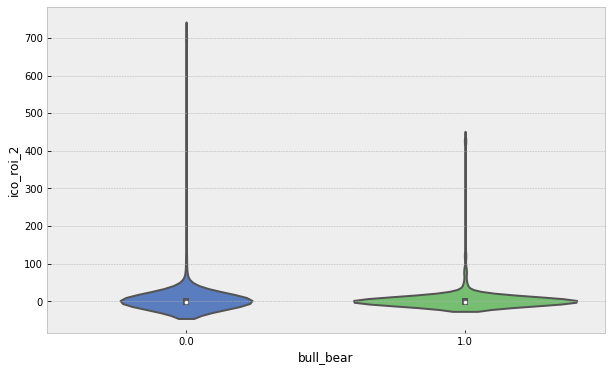

In [21]:
# violin plot of ROIs in bull vs. bear markets

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.violinplot(x='bull_bear', y='ico_roi_2' , data=df, palette='muted')
#sns.despine()
plt.show()

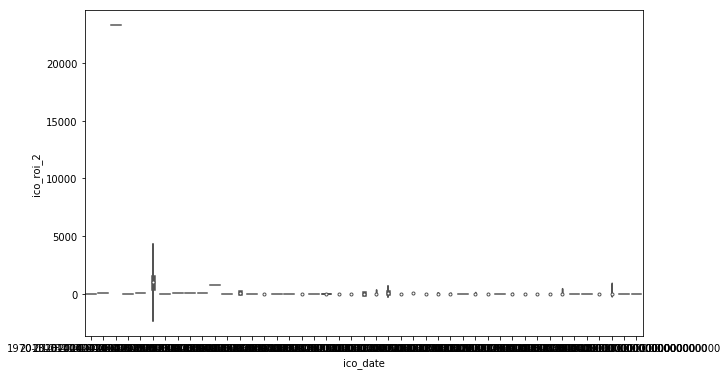

In [89]:
# violion plots of ROI across months/years

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.violinplot(x='ico_date', y='ico_roi_2' , data=df, palette='muted')
plt.show()

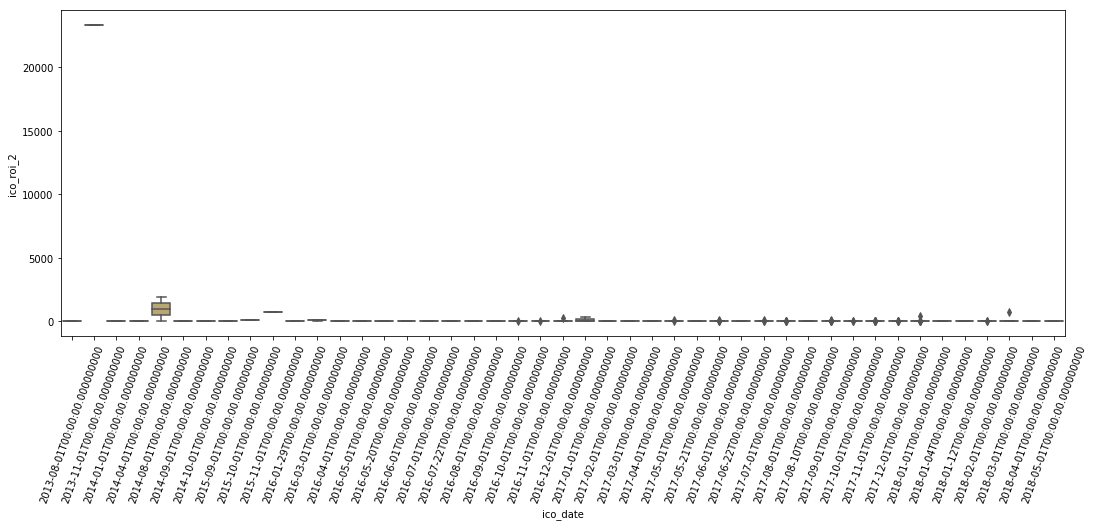

In [127]:
# same thing, cut Nxt coin <--- doesn't work


fig, ax = plt.subplots(figsize=(18,6))
ax = sns.boxplot(x='ico_date', y='ico_roi_2' , data=df, palette='muted')
plt.xticks(rotation=70)
plt.show()

In [11]:
# wait wtf... 1970?
# let's clean this up: use May 21 2017 as ICO_date (https://icobench.com/ico/apx)
df.iat[295,1] = pd.to_datetime('2017-05-21')
print(df.iloc[295])

Name                          APX
ico_date      2017-05-21 00:00:00
ico_px                       3.82
current_px                8.12876
ico_roi_2                  1.1279
bull_bear                     NaN
log_roi                  0.120357
log_roi_2                0.120357
Name: 295, dtype: object


In [12]:
df['ico_date'] = pd.to_datetime(df['ico_date'], infer_datetime_format=True)
df['ico_date'].dtype

dtype('<M8[ns]')

In [13]:
#strip the datetime into years, month, time of day

df['year'], df['month'] = df['ico_date'].dt.year, df['ico_date'].dt.month
df.head()

,Name,ico_date,ico_px,current_px,ico_roi_2,bull_bear,log_roi,log_roi_2,year,month
0,Rise,2016-06-01,0.52978,0.080822,-0.8474,NaN,1.000000,-0.165582,2016,6
1,B2BX,2017-11-01,0.74000,0.336894,-0.5447,NaN,1.000000,-0.607520,2017,11
2,Bonpay,2017-11-01,0.85369,0.250486,-0.7066,NaN,1.000000,-0.347291,2017,11
3,BAT,2017-05-01,0.03500,0.311497,7.8999,1.0,2.066850,2.066850,2017,5
4,Raiden Network Token,2017-11-01,0.67000,1.391090,1.0763,NaN,0.073529,0.073529,2017,11


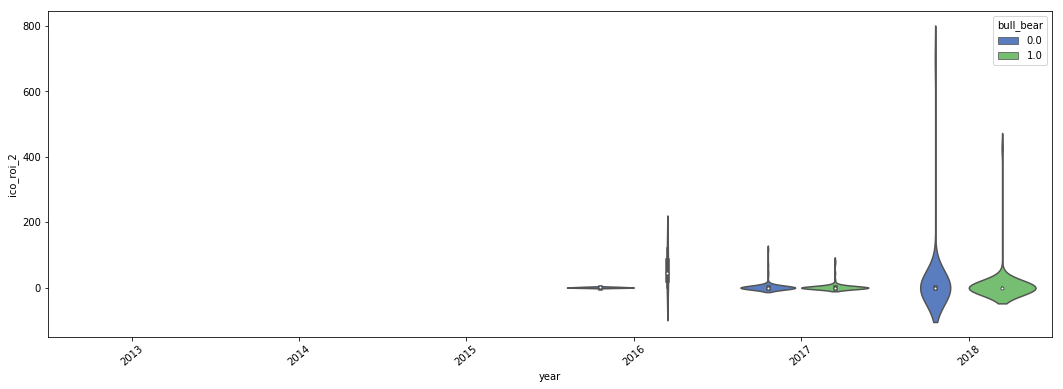

In [121]:
#let's look at years

fig, ax = plt.subplots(figsize=(18,6))
ax = sns.violinplot(x='year', y='ico_roi_2' , data=df, hue='bull_bear', palette='muted')
plt.xticks(rotation=40)

plt.show()

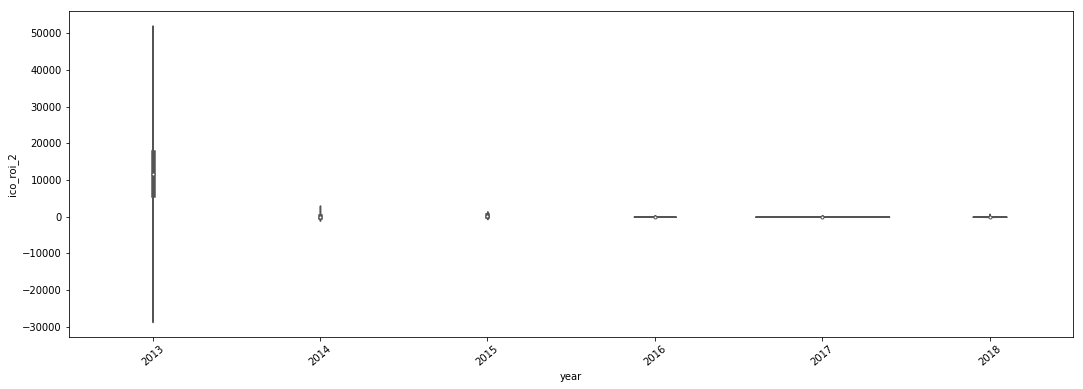

In [123]:
#look at year performance w/o market environment distinction

fig, ax = plt.subplots(figsize=(18,6))
ax = sns.violinplot(x='year', y='ico_roi_2' , data=df, palette='muted')
plt.xticks(rotation=40)

plt.show()

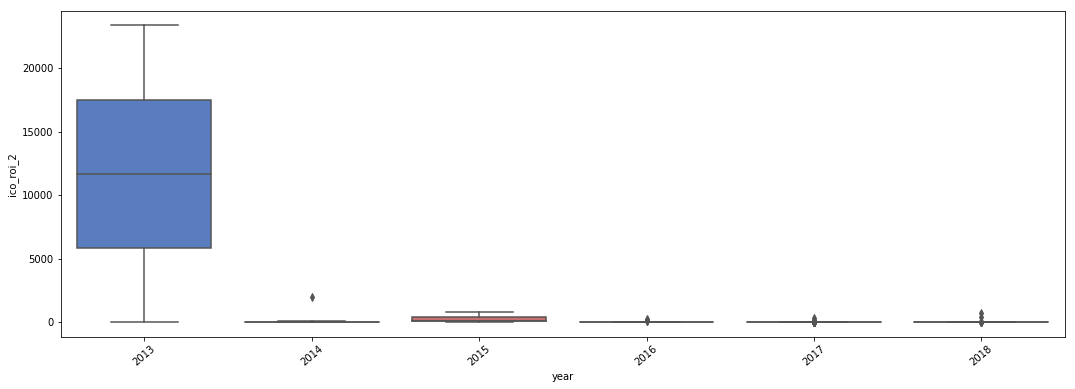

In [125]:
# same as above as boxplot

fig, ax = plt.subplots(figsize=(18,6))
ax = sns.boxplot(x='year', y='ico_roi_2' , data=df, palette='muted')
plt.xticks(rotation=40)

plt.show()

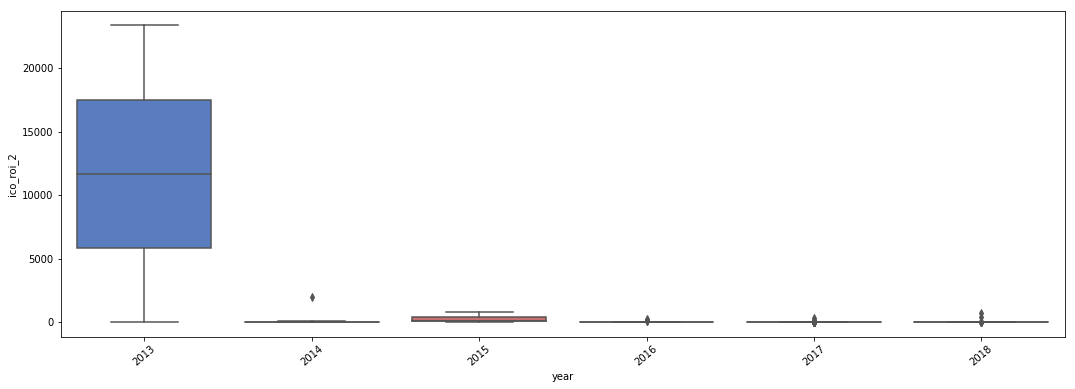

In [124]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.boxplot(x='year', y='ico_roi_2' , data=df, palette='muted')
plt.xticks(rotation=40)

plt.show()

It seems like only in 2016 did ICOs in bull markets outperform ICOs in bear markets. 2017 saw relatively same amounts and 2018 had more variation than 2017 but less than 2016.  Pre-2016 likely considered "purgatory".


Upon further investigation, differences in variation likely due to small sample size of 2016 ICOs (35 compared with 2017's ICO count of 305).

In [120]:
df['year'].value_counts()

# was worried that the bull and bear intervals wouldn't accurately capture all the day (ie pre-2015) but only 8 ICOs took place pre-2015. 

2017    305
2018    107
2016     35
2014      6
2015      3
2013      2
Name: year, dtype: int64

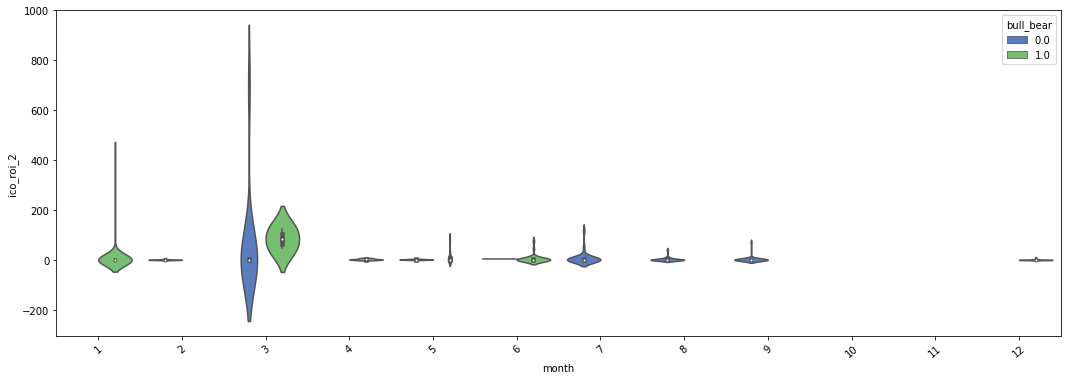

In [122]:
#let's look at months

fig, ax = plt.subplots(figsize=(18,6))
ax = sns.violinplot(x='month', y='ico_roi_2' , data=df, hue='bull_bear', palette='muted')
plt.xticks(rotation=40)

plt.show()

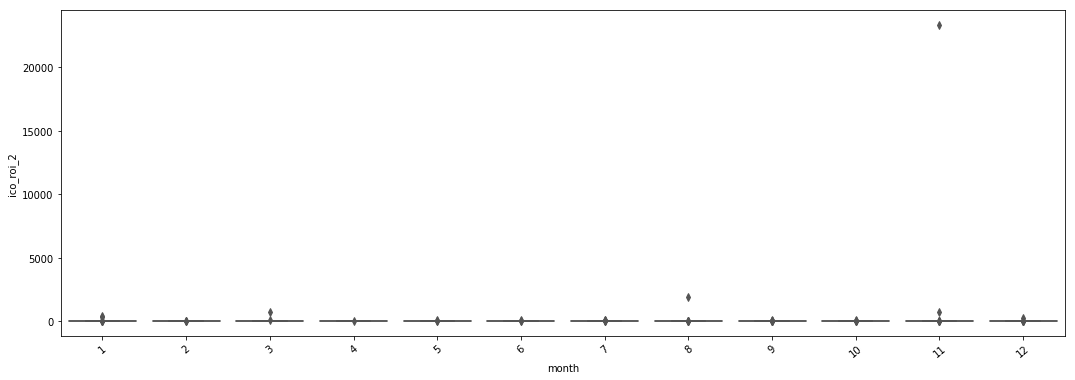

In [129]:
# months without environment distinction


fig, ax = plt.subplots(figsize=(18,6))
ax = sns.boxplot(x='month', y='ico_roi_2' , data=df, palette='muted')
plt.xticks(rotation=40)

plt.show()


In [133]:
df['day'].value_counts()

1    458
Name: day, dtype: int64

In [137]:
#oops nvm, drop day column since it's not a feature
# already dropped
df.head()

,Name,ico_date,ico_px,current_px,ico_roi_2,bull_bear,year,month
0,Rise,2016-06-01,0.52978,0.080822,-0.8474,NaN,2016,6
1,B2BX,2017-11-01,0.74000,0.336894,-0.5447,NaN,2017,11
2,Bonpay,2017-11-01,0.85369,0.250486,-0.7066,NaN,2017,11
3,BAT,2017-05-01,0.03500,0.311497,7.8999,1.0,2017,5
4,Raiden Network Token,2017-11-01,0.67000,1.391090,1.0763,NaN,2017,11


In [5]:
# we have severe outlier data but it is correct... will try log func to rescale the data

df['log_roi'] = np.log(np.ma.array(df.ico_roi_2))

c:\users\garrick\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df.head()

,Name,ico_date,ico_px,current_px,ico_roi_2,bull_bear,log_roi
0,Rise,2016-06-01,0.52978,0.080822,-0.8474,NaN,1.000000
1,B2BX,2017-11-01,0.74000,0.336894,-0.5447,NaN,1.000000
2,Bonpay,2017-11-01,0.85369,0.250486,-0.7066,NaN,1.000000
3,BAT,2017-05-01,0.03500,0.311497,7.8999,1.0,2.066850
4,Raiden Network Token,2017-11-01,0.67000,1.391090,1.0763,NaN,0.073529


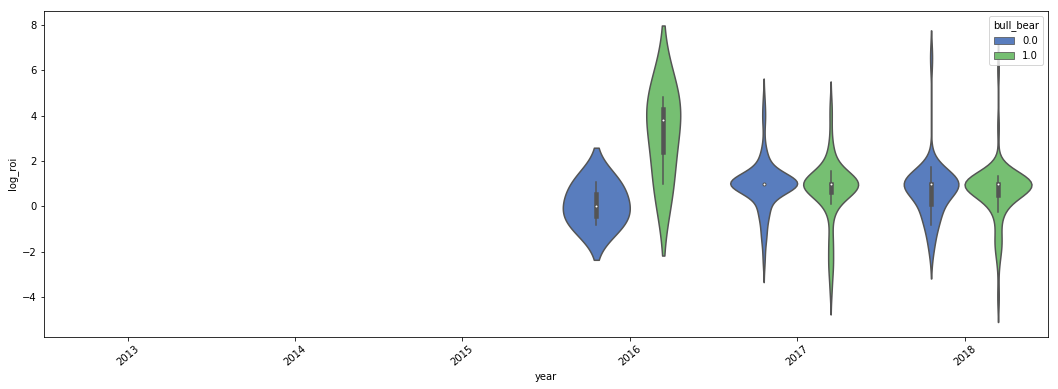

In [145]:
#let's revisit years and months


fig, ax = plt.subplots(figsize=(18,6))
ax = sns.violinplot(x='year', y='log_roi' , data=df, hue='bull_bear', palette='muted')
plt.xticks(rotation=40)

plt.show()

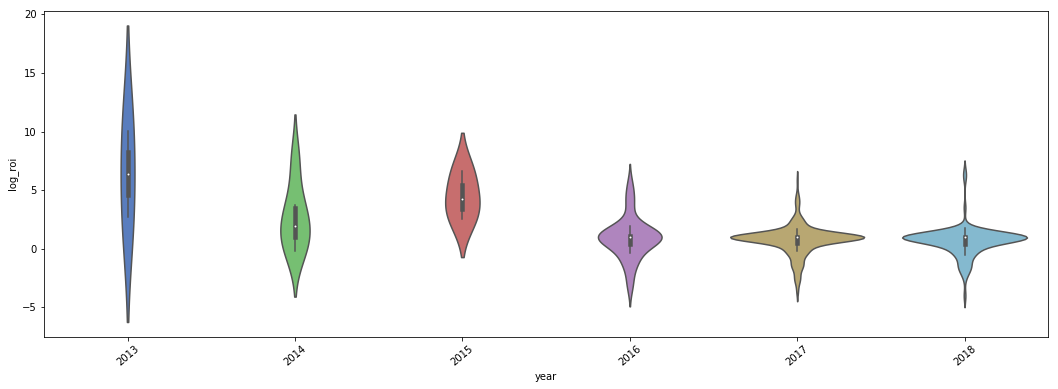

In [146]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.violinplot(x='year', y='log_roi' , data=df, palette='muted')
plt.xticks(rotation=40)

plt.show()

In [7]:
import math
def custom_log(value):
    if value < 0:
        return math.log(-value)
    else:
        return math.log(value)

In [8]:
df['log_roi_2'] = df['ico_roi_2'].apply(custom_log)

In [9]:
df.head()

,Name,ico_date,ico_px,current_px,ico_roi_2,bull_bear,log_roi,log_roi_2
0,Rise,2016-06-01,0.52978,0.080822,-0.8474,NaN,1.000000,-0.165582
1,B2BX,2017-11-01,0.74000,0.336894,-0.5447,NaN,1.000000,-0.607520
2,Bonpay,2017-11-01,0.85369,0.250486,-0.7066,NaN,1.000000,-0.347291
3,BAT,2017-05-01,0.03500,0.311497,7.8999,1.0,2.066850,2.066850
4,Raiden Network Token,2017-11-01,0.67000,1.391090,1.0763,NaN,0.073529,0.073529


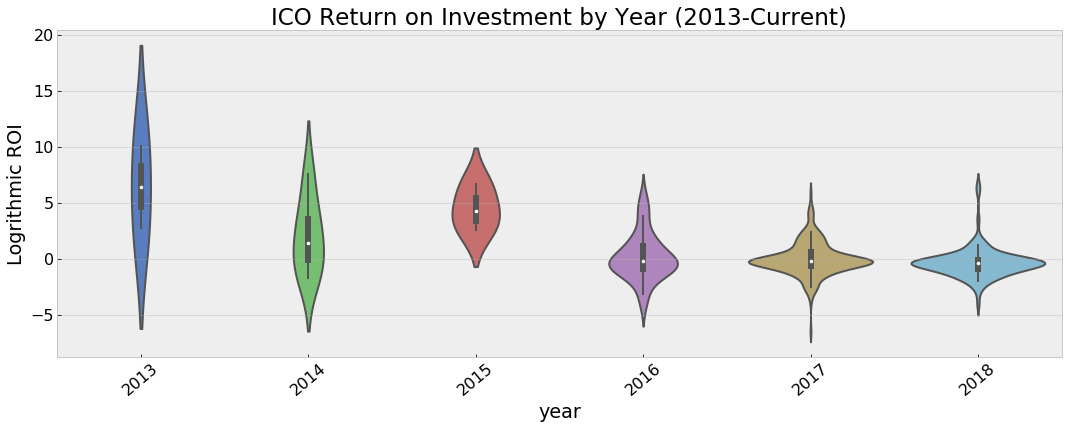

In [163]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.violinplot(x='year', y='log_roi_2' , data=df, palette='muted')
plt.title('ICO Return on Investment by Year (2013-Current)')
plt.ylabel('Logrithmic ROI')
plt.xticks(rotation=40)

plt.show()

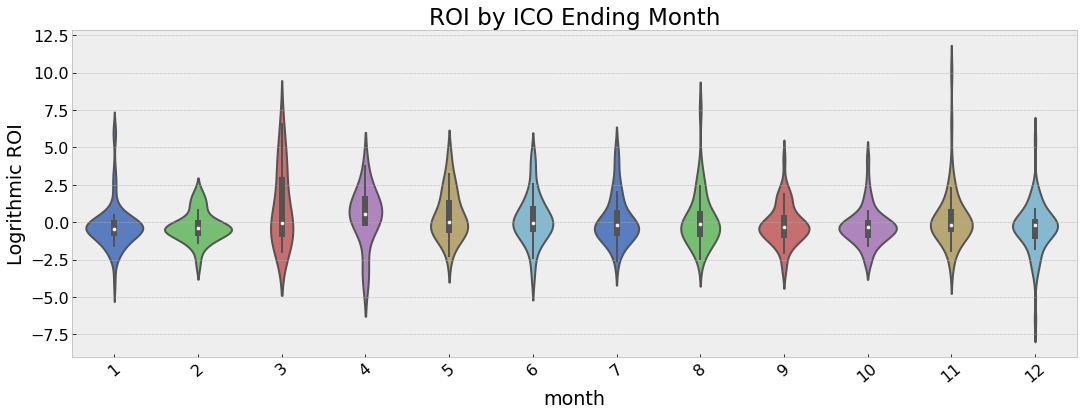

In [161]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.violinplot(x='month', y='log_roi_2' , data=df, palette='muted')
plt.title('ROI by ICO Ending Month')
plt.ylabel('Logrithmic ROI')
plt.xticks(rotation=40)

plt.show()

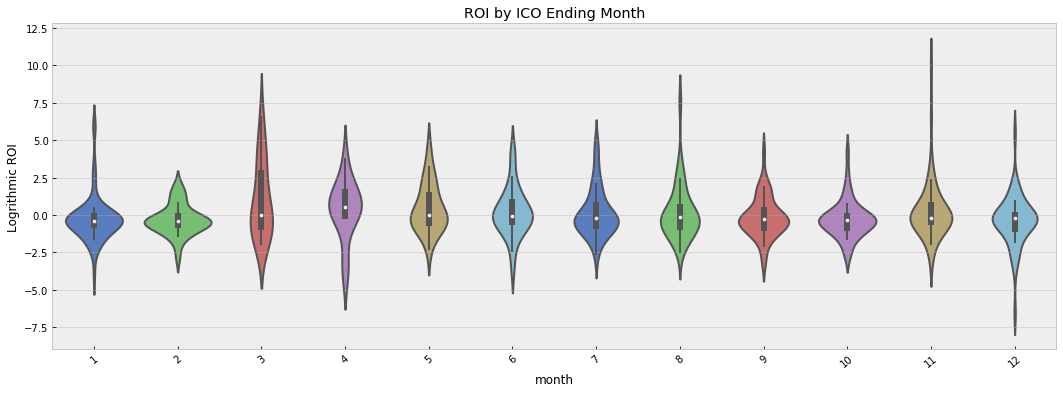

In [14]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.violinplot(x='month', y='log_roi_2' , data=df, palette='muted')
plt.title('ROI by ICO Ending Month')
plt.ylabel('Logrithmic ROI')
plt.xticks(rotation=40)

plt.show()

In [17]:
df['month'].value_counts()

1     69
11    58
12    56
9     48
10    46
8     36
2     32
7     31
6     29
5     22
3     16
4     14
Name: month, dtype: int64

On average, ending your ICO in April yields a higher ROI for investors.  However, risk of substantial loss is higher than most months. 

In [168]:
#let's feature engineer the life and add another bull_bear_purg column so we don't have NaNs while maintaining the bull_bear col

labels_2 = []

for date in df['ico_date']:
    if date in bull_1:
        labels_2.append(int(1))
    elif date in bull_2:
        labels_2.append(int(1))
    elif date in bull_3:
        labels_2.append(int(1))
    elif date in bull_4:
        labels_2.append(int(1))
    elif date in bear_1:
        labels_2.append(int(0))
    elif date in bear_2:
        labels_2.append(int(0))
    elif date in bear_3:
        labels_2.append(int(0))
    elif date in bear_4:
        labels_2.append(int(0))
    else:
        labels_2.append(int(2))

In [170]:
df['bull_bear_purg'] = labels_2

In [171]:
df.head()

,Name,ico_date,ico_px,current_px,ico_roi_2,bull_bear,year,month,log_roi,log_roi_2,bull_bear_purg
0,Rise,2016-06-01,0.52978,0.080822,-0.8474,NaN,2016,6,1.000000,-0.165582,2
1,B2BX,2017-11-01,0.74000,0.336894,-0.5447,NaN,2017,11,1.000000,-0.607520,2
2,Bonpay,2017-11-01,0.85369,0.250486,-0.7066,NaN,2017,11,1.000000,-0.347291,2
3,BAT,2017-05-01,0.03500,0.311497,7.8999,1.0,2017,5,2.066850,2.066850,1
4,Raiden Network Token,2017-11-01,0.67000,1.391090,1.0763,NaN,2017,11,0.073529,0.073529,2


In [199]:
# total_life in months
#from datetime import datetime
#from dateutil import relativedelta

# additional code from repo: https://gist.github.com/amalgjose/c767a4846d6ecaa3b6d7

In [220]:
df['current'] = pd.Timestamp.now()
df['life_months'] = ((df.current - df.ico_date)/ np.timedelta64(1, 'M')).astype(int)

In [221]:
df['life_years'] = ((df.current - df.ico_date)/ np.timedelta64(1, 'Y')).astype(float).round(decimals=1)

In [222]:
df['life_years_rd'] = ((df.current - df.ico_date)/ np.timedelta64(1, 'Y')).astype(int)

In [223]:
df.drop('current', axis=1, inplace=True)

In [90]:
df.to_csv('coinist_labelled2.csv')

In [92]:
df = pd.read_csv('coinist_labelled2.csv', index_col=0)

In [93]:
df.head()

,Name,ico_date,ico_px,current_px,ico_roi_2,bull_bear,year,month,log_roi,log_roi_2,bull_bear_purg,life_years,life_months,life_years_rd
0,Rise,6/1/2016,0.52978,0.080822,-0.8474,NaN,2016,6,1.000000,-0.165582,2,2.0,24,2
1,B2BX,11/1/2017,0.74000,0.336894,-0.5447,NaN,2017,11,1.000000,-0.607520,2,0.6,6,0
2,Bonpay,11/1/2017,0.85369,0.250486,-0.7066,NaN,2017,11,1.000000,-0.347291,2,0.6,6,0
3,BAT,5/1/2017,0.03500,0.311497,7.8999,1.0,2017,5,2.066850,2.066850,1,1.1,13,1
4,Raiden Network Token,11/1/2017,0.67000,1.391090,1.0763,NaN,2017,11,0.073529,0.073529,2,0.6,6,0


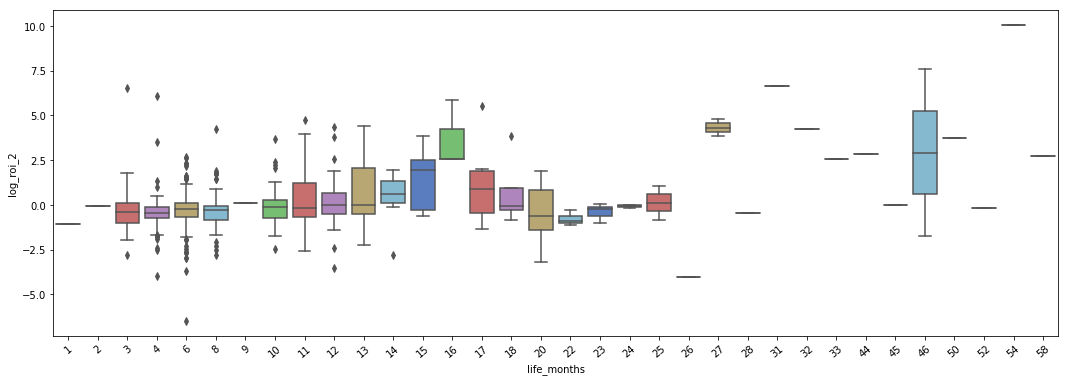

In [217]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.boxplot(x='life_months', y='log_roi_2' , data=df, palette='muted')
plt.xticks(rotation=40)

plt.show()

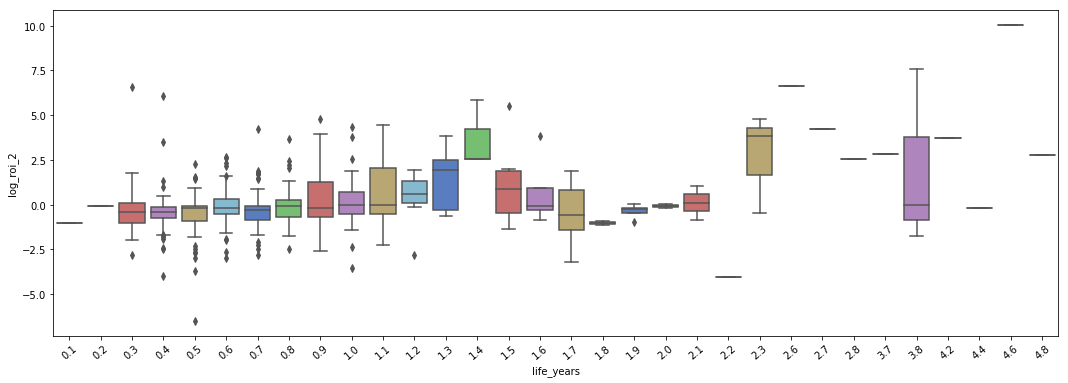

In [218]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.boxplot(x='life_years', y='log_roi_2' , data=df, palette='muted')
plt.xticks(rotation=40)

plt.show()

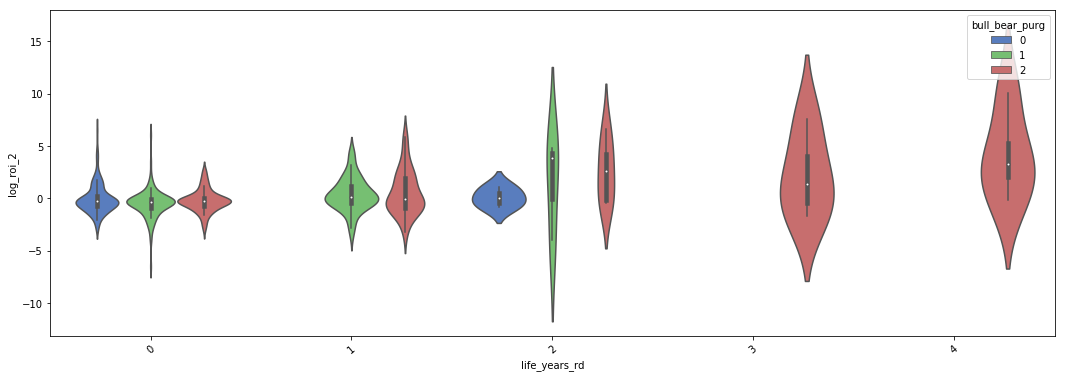

In [228]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.violinplot(x='life_years_rd', y='log_roi_2' , hue='bull_bear_purg', data=df, palette='muted')
plt.xticks(rotation=40)

plt.show()

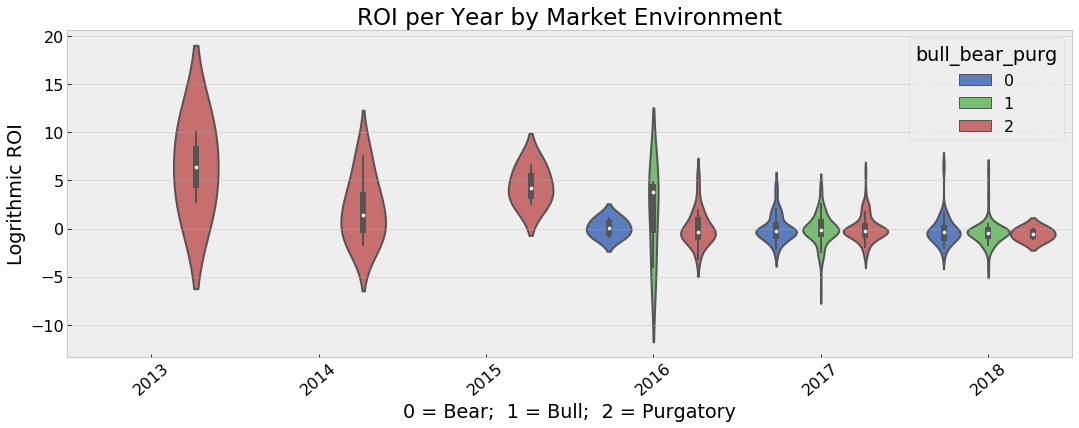

In [159]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.violinplot(x='year', y='log_roi_2' , hue='bull_bear_purg', data=df, palette='muted')
plt.title('ROI per Year by Market Environment')
plt.ylabel('Logrithmic ROI')
plt.xlabel('0 = Bear;  1 = Bull;  2 = Purgatory')
plt.xticks(rotation=40)

plt.show()

In [5]:
df = pd.read_csv('coinist_labelled2.csv', index_col=0)

Further investigate ICO price.... let's find mean/median and see if there's any correlation between that and ROI.

Another avenue to pursue... use featuretools and to extract new features and utilize in...

Will do hypothesis testing and then do an k-NN cluster with just two clusters and label datapoints w/ top and bottom ROIs and Mean ROI and see if they are aligned with respective cluster. 

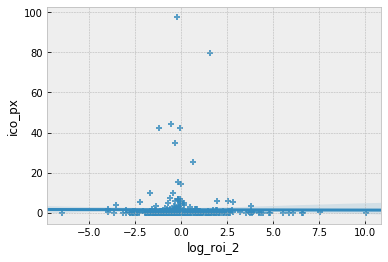

In [25]:
ax = sns.regplot(x=df['log_roi_2'].loc[df['ico_px'] != 7554.0], y=df['ico_px'].loc[df['ico_px'] != 7554.0], marker='+')
plt.show()

In [9]:
df['ico_px'].mean()

18.079829982253827

In [10]:
df['ico_px'].max()

7554.0

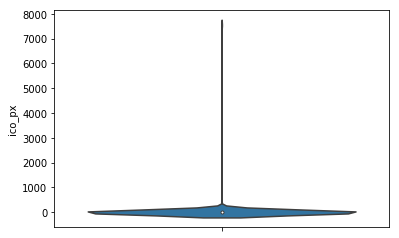

In [7]:
sns.violinplot(y='ico_px', data=df)

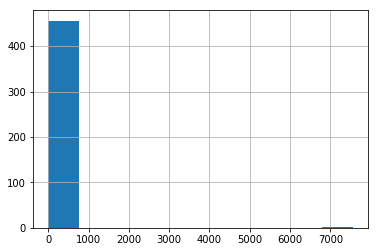

In [13]:
df['ico_px'].hist()

In [11]:
df.loc[df['ico_px'] == 7554.0]

,Unnamed: 0,Name,ico_date,ico_px,current_px,ico_roi_2,bull_bear,year,month,log_roi,log_roi_2,bull_bear_purg,life_years,life_months,life_years_rd
170,170,Primalbase Token,2017-06-01,7554.0,1743.76,-0.7692,1.0,2017,6,1.0,-0.262404,1,1.0,12,1


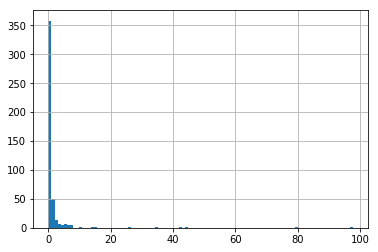

In [16]:
df['ico_px'].loc[df['ico_px'] != 7554.0].hist(bins=100)

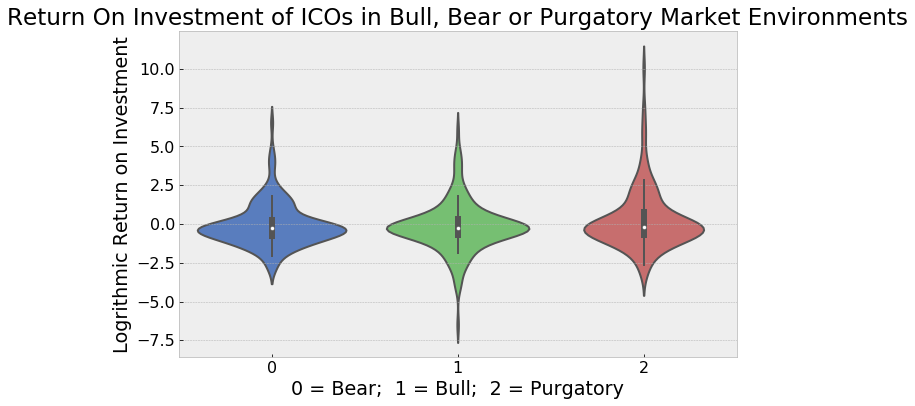

In [156]:
#let's make some more plots


fig, ax = plt.subplots(figsize=(10,6))
ax = sns.violinplot(x='bull_bear_purg', y='log_roi_2' , data=df, palette='muted', order=[0,1,2])
plt.title('Return On Investment of ICOs in Bull, Bear or Purgatory Market Environments')
plt.ylabel('Logrithmic Return on Investment')
plt.xlabel('0 = Bear;  1 = Bull;  2 = Purgatory')
plt.show()

In [96]:
#get frequency of ICOs by month... need to strip year-month from dates

df['ico_date'] = pd.to_datetime(df['ico_date'])

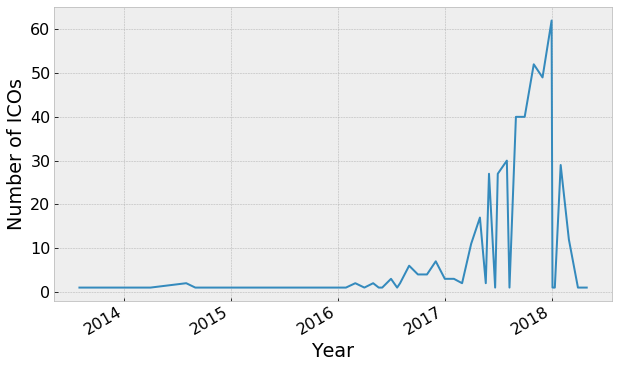

In [131]:
fig, ax = plt.subplots(figsize=(10,6))
ax = df['ico_date'].groupby(df['ico_date']).count().plot()
ax = ax.tick_params(axis='x',which='minor', bottom='on')
plt.ylabel('Number of ICOs')
plt.xlabel('Year')
plt.show()

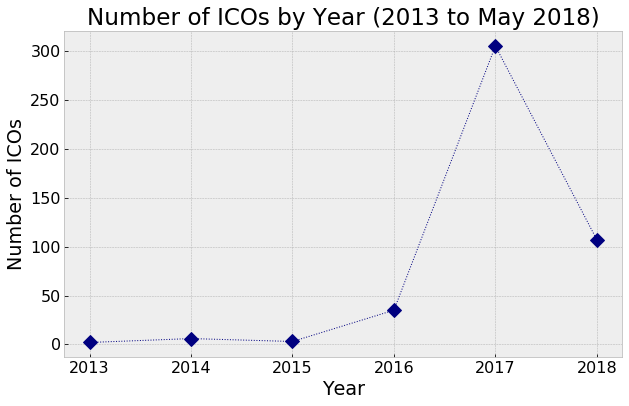

In [155]:
fig, ax = plt.subplots(figsize=(10,6))
ax = df['year'].groupby(df['year']).count().plot(color='navy', marker='D', markersize=10, linewidth=1, linestyle=':')
ax = ax.tick_params(axis='x',which='minor', bottom='on')

plt.title('Number of ICOs by Year (2013 to May 2018)')
plt.ylabel('Number of ICOs')
plt.xlabel('Year')
plt.show()


In [168]:
num_losers = df['log_roi_2'].loc[df['log_roi_2'] < 0].count()
num_winners = df['log_roi_2'].loc[df['log_roi_2'] >= 0].count()
print(num_losers)
print(num_winners)

313
144


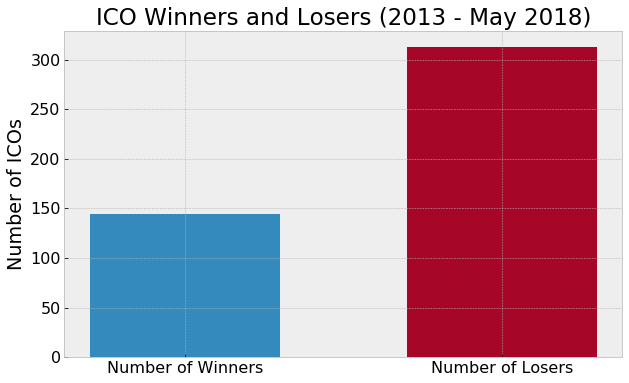

In [182]:
fig, ax = plt.subplots(figsize=(10,6))
ax = plt.bar('Number of Winners',height=num_winners, width=0.6, align='center')
ax = plt.bar('Number of Losers', height=num_losers, width=0.6, align='center')
plt.title('ICO Winners and Losers (2013 - May 2018)')
plt.ylabel('Number of ICOs')
plt.show()

In [27]:
df['bull_bear_purg'].value_counts()

KeyError: 'bull_bear_purg'